## Simulate Sensor data & Apply PCA

1. Apply PCA with upto 5 components
2. Visualize how much variance of the dataset is defined by each component
3. Visualize the first 2 principal components and color them by timestep
4. Simulate a new position using code below
5. Plot the new point in the original 2D PCA graph


In [81]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [82]:
# Step 1 Simulate synthetic predictive maintenance dataset
np.random.seed(42)
time_steps = 10000

sensors = {}
for i in range(1, 21):
    sensors[f'Sensor{i}'] = np.linspace(50, 100, time_steps) + np.random.normal(0, 20, time_steps)

# Combine into a DataFrame
data = pd.DataFrame(sensors)

print("Sample Data:")
print(data.head())

Sample Data:
     Sensor1    Sensor2    Sensor3    Sensor4    Sensor5    Sensor6  \
0  59.934283  36.430105  56.965725  10.388561  40.562849  51.964123   
1  47.239714  43.895011  55.671472  28.905288  70.259050  48.722836   
2  62.963772  38.062380  31.279604  38.269433  46.046264  69.045816   
3  80.475599  52.223362  61.606686  53.008380  51.826387  80.671624   
4  45.336935  73.963573  20.218348  70.503249  64.367814  63.756941   

     Sensor7    Sensor8    Sensor9   Sensor10   Sensor11   Sensor12  \
0  51.576755  56.403048  63.280022  69.217891  70.611892  66.017477   
1  61.262950  72.314233  44.082680  42.605706  26.897905  49.021813   
2  56.832040  19.905237  48.678273  38.418383  61.518745  41.079748   
3  24.456718  84.807115  46.507354  68.681245  37.630232  53.375301   
4  46.295596  56.621738  60.301076  -4.610793  43.471946   7.484493   

    Sensor13   Sensor14   Sensor15   Sensor16   Sensor17   Sensor18  \
0  45.626995  72.350652  44.689254  77.397560  78.652455  13.5

In [83]:
# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Display scaled data
print("Scaled Data Sample:")
print(pd.DataFrame(scaled_data, columns=data.columns).head())

Scaled Data Sample:
    Sensor1   Sensor2   Sensor3   Sensor4   Sensor5   Sensor6   Sensor7  \
0 -0.610580 -1.566006 -0.725010 -2.596654 -1.407431 -0.927666 -0.969437   
1 -1.126525 -1.265030 -0.777771 -1.850742 -0.198347 -1.057996 -0.572396   
2 -0.487452 -1.500195 -1.772111 -1.473524 -1.184173 -0.240819 -0.754021   
3  0.224281 -0.929241 -0.535820 -0.879792 -0.948835  0.226649 -2.081098   
4 -1.203859 -0.052701 -2.223025 -0.175043 -0.438209 -0.453482 -1.185914   

    Sensor8   Sensor9  Sensor10  Sensor11  Sensor12  Sensor13  Sensor14  \
0 -0.746813 -0.479506 -0.232249 -0.186682 -0.367113 -1.184181 -0.110562   
1 -0.106939 -1.258090 -1.320570 -1.955170 -1.054209 -0.697301 -0.772550   
2 -2.214587 -1.071707 -1.491814 -0.554553 -1.375289 -0.412171 -0.701019   
3  0.395468 -1.159753 -0.254195 -1.520984 -0.878208 -1.964016 -1.982653   
4 -0.738018 -0.600323 -3.251518 -1.284652 -2.733470 -0.924990 -0.686938   

   Sensor15  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  
0 -1.220616  0

1. Apply PCA with upto 5 components

PCA is used to reduce the dimensionality of the data by focusing on the components that capture the most variance.This makes the data easier to analyze while minimizing information loss. The data is reoriented along new axes(principal components), which are linear combinaations of the original features.(feature transformation)

In [84]:
#Apply PCA for 5 components
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_sensors = pca.fit_transform(scaled_data)
pca_sensors_df = pd.DataFrame(data=pca_sensors,columns=['p 1', 'p 2', 'p 3', 'p 4', 'p 5'])
pca_sensors_df.head()

,p 1,p 2,p 3,p 4,p 5
0,-3.697276,0.807661,0.827017,1.785296,-0.265841
1,-4.330366,0.303912,-0.256562,-0.264370,-1.273695
2,-4.869362,-0.678489,0.499375,0.677106,0.598557
3,-3.728347,0.066625,0.505255,0.944187,0.119946
4,-5.039456,-0.849799,-2.145603,-0.287005,0.598844


Lets see how much of our variance is explained by each component Analysis

In [85]:
print("Explained variability per principal componet:{}".format(pca.explained_variance_ratio_))

Explained variability per principal componet:[0.37687365 0.0359165  0.03507436 0.03489235 0.03428399]


In [86]:
#Find out the total variance explained
pca.explained_variance_ratio_.sum()

np.float64(0.5170408648669613)

By the 5 principal components, the total variance explained is >51%. Keep in mind that the the original dataset has 20 variables.So we reduced the dimensionality of the data from 20 variables to 5 and still preserved the greater part of information.

2. Visualize how much variance of the dataset is defined by each component

In [87]:
import seaborn as sns

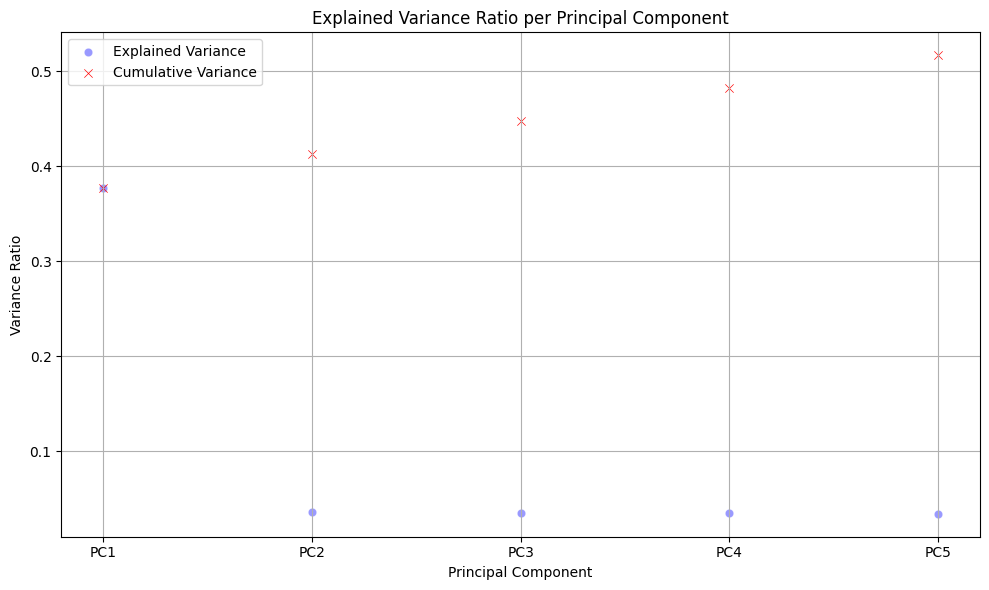

In [88]:
#Get indicidual variance ration per component
explained_variance_ratio = pca.explained_variance_ratio_

#Create data frame
explained_variance_df = pd.DataFrame({
    'Principal Component':[f"PC{i+1}" for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio':explained_variance_ratio
})
#Get cumilative Variance
explained_variance_df["Cumulative Variance"] = np.cumsum(explained_variance_df["Explained Variance Ratio"])


# Convert Principal Component labels to numerical indices for plotting
explained_variance_df["PC Index"] = range(1, len(explained_variance_ratio) + 1)

# Plot both Explained Variance Ratio and Cumulative Variance
plt.figure(figsize=(10, 6))

# Scatter plot for individual explained variance ratio
sns.scatterplot(x="PC Index", y="Explained Variance Ratio", data=explained_variance_df, label="Explained Variance", marker="o", color="blue", alpha=0.4)

# Scatter plot for cumulative variance
sns.scatterplot(x="PC Index", y="Cumulative Variance", data=explained_variance_df, label="Cumulative Variance",marker="x", color="red")

# Labels and styling
plt.xticks(explained_variance_df["PC Index"], explained_variance_df["Principal Component"])  # Show PC labels
plt.title("Explained Variance Ratio per Principal Component")
plt.ylabel("Variance Ratio")
plt.xlabel("Principal Component")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

3. Visualize the first 2 principal components and color them by timestep

In [89]:
#Define the index as time step
pca_sensors_df["Timestep"] = range(len(pca_sensors_df))

C:\Users\davor\AppData\Local\Temp\ipykernel_14100\3040271739.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


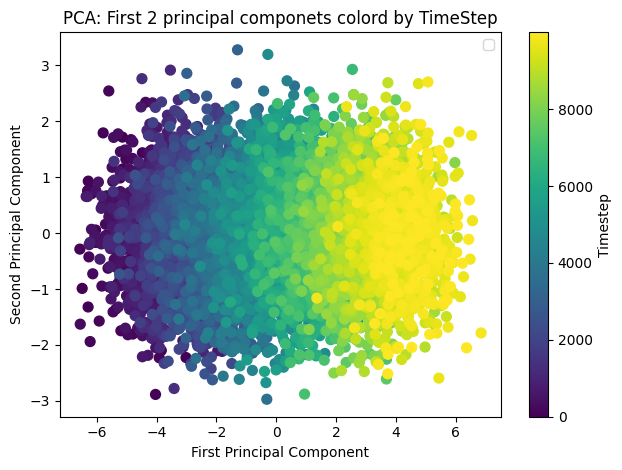

In [90]:
plt.scatter(pca_sensors_df["p 1"],
           pca_sensors_df["p 2"],
           c=pca_sensors_df["Timestep"], s=50)
plt.colorbar(label='Timestep')
plt.title("PCA: First 2 principal componets colord by TimeStep")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.tight_layout()
plt.show()

4. Simulate a new position using code below

In [91]:
# Step 4: Simulate a new observation and predict its position
new_observation = np.array([[75] * 20])
scaled_new_observation = scaler.transform(new_observation)
new_pca = pca.transform(scaled_new_observation)

print("New observation PCA position:", new_pca)

New observation PCA position: [[-0.00353968  0.01164137 -0.00388459  0.0007376   0.00233923]]


c:\Users\davor\miniconda3\envs\data_things\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


5. Plot the new point in the original 2D PCA graph

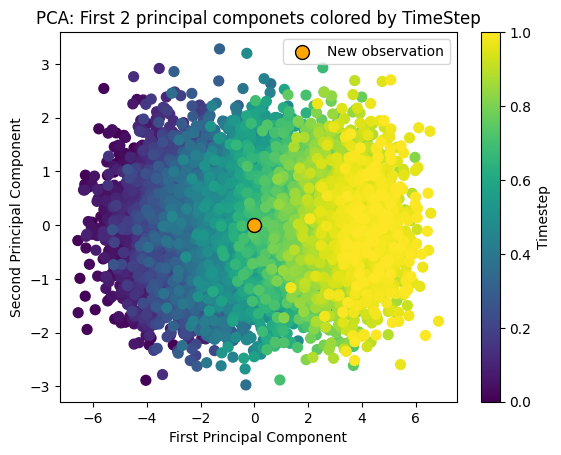

In [92]:
plt.scatter(pca_sensors_df["p 1"],
           pca_sensors_df["p 2"],
           c=pca_sensors_df["Timestep"], s=50)
plt.scatter(new_pca[0,0], new_pca[0,1], c="orange", label="New observation", s=100, edgecolors='black')
plt.colorbar(label='Timestep')
plt.title("PCA: First 2 principal componets colored by TimeStep")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()